# Experiment Report

In [2]:
import os
import numpy as np
np.warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import seaborn as sns
import json
%matplotlib inline

# statistics
from scipy import stats
from itertools import product, combinations

In [3]:
root = "/mnt/storage/log-experiments/"
results_path = "results/masters2/"
experiments = [f for f in os.listdir(root+results_path) if f[-4:] == 'json']
results = {}
for exp in experiments:
    exp_name = exp[:-5]
    try:
        with open( root+ results_path + exp, 'r') as f:
            results[exp_name] = json.load(f)
    except:
        pass


In [4]:
experiments

['dqn.json',
 'dqn_focus_sharing.json',
 'dqn_prio.json',
 'dqn_prio_focus_sharing.json',
 'dqn_prio_sharing.json',
 'dqn_sharing.json']

In [6]:
episode_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    episode_count[exp_name] = results[exp_name]['episodes_to_complete']

In [7]:
for key, data in episode_count.items():
    print("{}: {}".format(key, sorted(data).count(1000)))

dqn: 0
dqn_focus_sharing: 0
dqn_prio: 0
dqn_prio_focus_sharing: 5
dqn_prio_sharing: 26
dqn_sharing: 0


In [8]:
episode_count

{'dqn': [288,
  101,
  588,
  130,
  297,
  525,
  186,
  226,
  133,
  969,
  405,
  120,
  138,
  95,
  298,
  156,
  632,
  237,
  688,
  414,
  473,
  124,
  116,
  401,
  368,
  216,
  111,
  321,
  98,
  117,
  92,
  353,
  270,
  201,
  496,
  106,
  154,
  379,
  501,
  385,
  129,
  362,
  146,
  581,
  416,
  380,
  395,
  536,
  440,
  483,
  104,
  161,
  508,
  194,
  493,
  145,
  691,
  337,
  360,
  616,
  363,
  445,
  367,
  181,
  525,
  159,
  120,
  211,
  165,
  426,
  464,
  538,
  372,
  356,
  380,
  325,
  422,
  481,
  334,
  358,
  120,
  110,
  429,
  157,
  293,
  313,
  415,
  129,
  394,
  226,
  360,
  118,
  139,
  585,
  130,
  673,
  198,
  107,
  383,
  109],
 'dqn_focus_sharing': [609,
  158,
  107,
  138,
  524,
  144,
  235,
  83,
  107,
  142,
  275,
  90,
  85,
  82,
  103,
  114,
  367,
  144,
  153,
  287,
  123,
  181,
  79,
  89,
  114,
  93,
  385,
  97,
  89,
  96,
  119,
  131,
  75,
  84,
  161,
  157,
  120,
  121,
  72,
  78,
  129,
 

In [9]:
print("means")
for k,v in episode_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in episode_count.items():
    print(np.std(v))


means
317.65
154.44
300.22
206.87
459.63
318.19

deviations
176.63637083001905
111.92303784297494
246.05209123273065
214.63348550494163
370.5722778352423
163.26283686130165


In [10]:
steps_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    steps_count[exp_name] = results[exp_name]['average_steps']

In [11]:
## NUM STEPS
print("means")
for k,v in steps_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in steps_count.items():
    print(np.std(v))

    

means
105.68587106600776
73.02307480332806
98.9723517768109
61.76747094768043
77.24034312112228
97.4411161502122

deviations
31.785959040461023
30.944366078730813
36.70766219563578
29.596308823530663
28.912127915935702
29.455519546998076


In [12]:
rewards_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    rewards_count[exp_name] = results[exp_name]['average_rewards']

In [13]:
## NUM STEPS
print("means")
for k,v in rewards_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in rewards_count.items():
    print(np.std(v))

    

means
105.68587106600776
73.02307480332806
98.9723517768109
61.76747094768043
77.24034312112228
97.4411161502122

deviations
31.785959040461023
30.944366078730813
36.70766219563578
29.596308823530663
28.912127915935702
29.455519546998076


In [14]:
experiments

['dqn.json',
 'dqn_focus_sharing.json',
 'dqn_prio.json',
 'dqn_prio_focus_sharing.json',
 'dqn_prio_sharing.json',
 'dqn_sharing.json']

In [15]:
results.keys()

dict_keys(['dqn', 'dqn_focus_sharing', 'dqn_prio', 'dqn_prio_focus_sharing', 'dqn_prio_sharing', 'dqn_sharing'])

In [176]:
experiments_labels = {
    'dqn_sharing': 'DQN + Naive ES',
    'dqn_prio_sharing': 'DQN-PR + Prioritized ES', 
    'dqn_prio_focus_sharing': 'DQN-PR + Prioritized Focused ES', 
    'dqn_focus_sharing': 'DQN + Focused ES', 
    'dqn': 'DQN',
    'dqn_prio': 'DQN-PR',
}

In [177]:
def plot(results, selected_experiments, colors):
    plt.figure(figsize=(10,4))
    # plt.xticks(np.arange(0,300000,50000))
    plt.xgrid(True)
    for exp_id, color in zip(selected_experiments, colors):
        # exp_label = experiments[exp_name]
        sns.distplot(results[exp_id], label=experiments_labels[exp_id], color=color)
        
    plt.legend()
    plt.xlabel("Number of episodes")
    plt.xlim((0,1000))

    # plt.ylim(0, 0.06)
        


In [178]:
colors = ['#003FFF', '#03ED3A', '#E8000B']

In [179]:
# dir(plt.rcParams)

In [180]:
# format plots
import matplotlib
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({"axes.grid": True, "grid.linewidth": 0.75})


In [202]:
def plot_multi(results, combinations, colors):
    # https://matplotlib.org/examples/pylab_examples/subplots_demo.html
    
    f, axes = plt.subplots(len(combinations), 1, sharex=True, figsize=(10,10))
    f.subplots_adjust(hspace=0.1)

    for idx, comb in enumerate(combinations):
        for exp_id, color in zip(comb, colors):
            sns.distplot(results[exp_id], label=experiments_labels[exp_id], color=color, ax=axes[idx], kde=True)

            axes[idx].xaxis.grid(True)
            axes[idx].yaxis.grid(False)
            axes[idx].legend()
            # axes[idx].yaxis.label("Frequency")

        axes[idx].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))            

    # plt.xlabel("Number of episodes to complete trial")
    f.text(0.5, 0.065, 'Number of episodes required to complete task', ha='center')
    f.text(0.02, 0.5, 'Frequency', va='center', rotation='vertical')
    plt.xlim((0,1000));

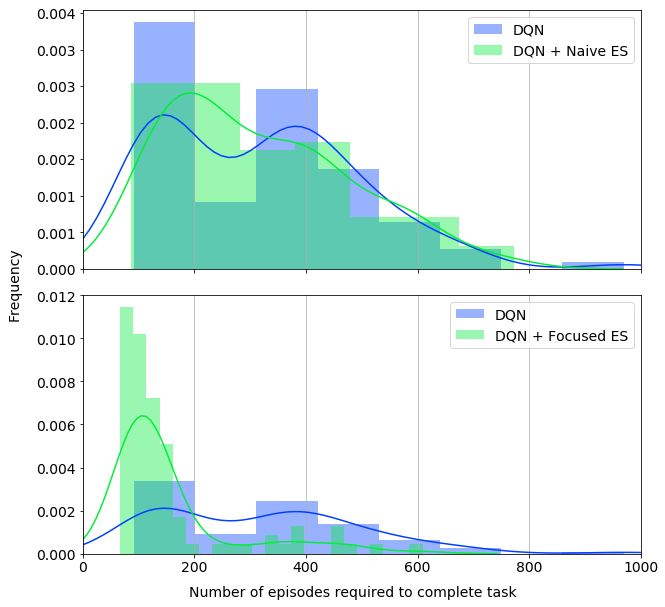

In [203]:
plot_multi(episode_count, (['dqn', 'dqn_sharing'], ['dqn', 'dqn_focus_sharing']), ['#003FFF', '#03ED3A'])
plt.savefig('singleVSmulti.png', dpi=200, bbox_inches='tight')

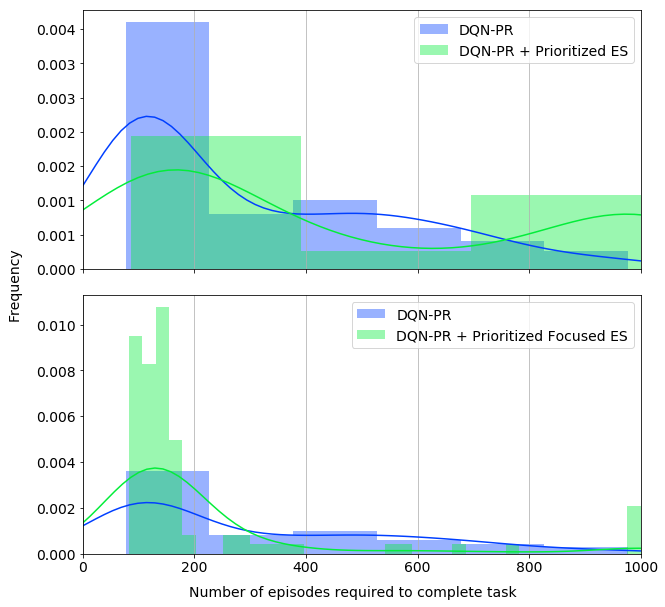

In [204]:
plot_multi(episode_count, (['dqn_prio', 'dqn_prio_sharing'], ['dqn_prio', 'dqn_prio_focus_sharing']), ['#003FFF', '#03ED3A'])
plt.savefig('singleVSmulti-prio.png', dpi=200, bbox_inches='tight')

In [205]:
def plot_single(results, selected_experiments, colors):
    plt.figure(figsize=(10,5))
    # plt.xticks(np.arange(0,300000,50000))
    plt.grid(axis='y')
    for exp_id, color in zip(selected_experiments, colors):
        # exp_label = experiments[exp_name]
        sns.distplot(results[exp_id], label=experiments_labels[exp_id], color=color)
        
    plt.legend()
    plt.xlabel("Number of episodes required to complete task", labelpad=9)
    plt.ylabel("Frequency", labelpad=10)
    plt.xlim((0,1000))

    # plt.ylim(0, 0.06)
        


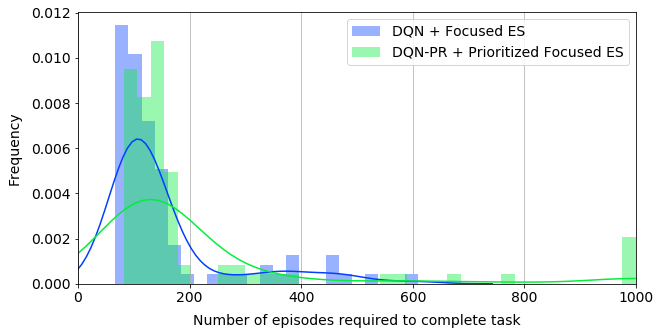

In [207]:
plot_single(episode_count, ['dqn_focus_sharing', 'dqn_prio_focus_sharing'], ['#003FFF', '#03ED3A'])
plt.savefig('multiComparison.png', dpi=200, bbox_inches='tight')

In [188]:
graph = {}

In [189]:
for k,v in episode_count.items():
    print(k, np.mean(v))


dqn 317.65
dqn_focus_sharing 154.44
dqn_prio 300.22
dqn_prio_focus_sharing 206.87
dqn_prio_sharing 459.63
dqn_sharing 318.19


In [190]:
graph['ETC Mean'] = []
for k,v in episode_count.items():
    graph['ETC Mean'].append(np.mean(v))

graph['ETC Deviation'] = []
for k,v in episode_count.items():
    graph['ETC Deviation'].append(np.std(v))

In [191]:
graph['Trials Failed'] = []
for k,v in episode_count.items():
    graph['Trials Failed'].append(sorted(v).count(1000))
    

In [192]:
experiments_labels.values()

dict_values(['DQN + Naive ES', 'DQN-PR + Prioritized ES', 'DQN-PR + Prioritized Focused ES', 'DQN + Focused ES', 'DQN', 'DQN-PR'])

In [193]:
pd.set_option("display.colheader_justify","left")
df = pd.DataFrame.from_dict(graph)
df = df.transpose()
df.columns=[experiments_labels[e] for e in episode_count.keys()]
df = df.transpose()
df['ETC Mean'] = df['ETC Mean'].round(decimals=2)
df['ETC Deviation'] = df['ETC Deviation'].round(decimals=2)
df['Trials Failed'] = pd.to_numeric(df['Trials Failed'], downcast='integer')
df.style.set_properties(**{'text-align': 'center'})
df = df.sort_values(by='ETC Mean')
df.head(10)


,ETC Mean,ETC Deviation,Trials Failed
DQN + Focused ES,154.44,111.92,0
DQN-PR + Prioritized Focused ES,206.87,214.63,5
DQN-PR,300.22,246.05,0
DQN,317.65,176.64,0
DQN + Naive ES,318.19,163.26,0
DQN-PR + Prioritized ES,459.63,370.57,26


In [198]:
# calculate improvements 
col = 'ETC Improvement' 
metric = 'ETC Mean'
df[col] = 0

base_key = 'DQN-PR'
for key in ['DQN-PR', 'DQN-PR + Prioritized Focused ES','DQN-PR + Prioritized ES']:
    df.loc[key, col] = (100*(df.loc[base_key, metric]-df.loc[key, metric])/df.loc[base_key, metric]).round(2)
    
base_key = 'DQN'
for key in ['DQN', 'DQN + Focused ES','DQN + Naive ES']:
    df.loc[key, col] = (100*(df.loc[base_key, metric]-df.loc[key, metric])/df.loc[base_key, metric]).round(2)
    


In [199]:
df.head()

,ETC Mean,ETC Deviation,Trials Failed,ETC Improvement
DQN + Focused ES,154.44,111.92,0,51.38
DQN-PR + Prioritized Focused ES,206.87,214.63,5,31.09
DQN-PR,300.22,246.05,0,0.00
DQN,317.65,176.64,0,0.00
DQN + Naive ES,318.19,163.26,0,-0.17


In [200]:
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  ETC Mean &  ETC Deviation &  Trials Failed &  ETC Improvement \\
\midrule
DQN + Focused ES                &  154.44   &  111.92        &   0            &  51.38           \\
DQN-PR + Prioritized Focused ES &  206.87   &  214.63        &   5            &  31.09           \\
DQN-PR                          &  300.22   &  246.05        &   0            &   0.00           \\
DQN                             &  317.65   &  176.64        &   0            &   0.00           \\
DQN + Naive ES                  &  318.19   &  163.26        &   0            &  -0.17           \\
DQN-PR + Prioritized ES         &  459.63   &  370.57        &  26            & -53.10           \\
\bottomrule
\end{tabular}



In [ ]:
# add number of episodes failed

In [201]:
def calc_stats(res):
    # get specific variable to compare
    all_values = list(res.items())
    samples = list(combinations(all_values, 2))
    for sample in samples:
        print(sample[0][0], "vs ",  sample[1][0])
        print("\n")
        print(stats.ks_2samp(sample[0][1], sample[1][1]))  
        print("\n")

calc_stats(episode_count)

dqn vs  dqn_focus_sharing


Ks_2sampResult(statistic=0.51, pvalue=3.696390026378737e-12)


dqn vs  dqn_prio


Ks_2sampResult(statistic=0.27, pvalue=0.0010291327972217178)


dqn vs  dqn_prio_focus_sharing


Ks_2sampResult(statistic=0.49999999999999994, pvalue=1.0553445530400817e-11)


dqn vs  dqn_prio_sharing


Ks_2sampResult(statistic=0.31999999999999995, pvalue=4.805188219110764e-05)


dqn vs  dqn_sharing


Ks_2sampResult(statistic=0.13, pvalue=0.34388571222170117)


dqn_focus_sharing vs  dqn_prio


Ks_2sampResult(statistic=0.31999999999999995, pvalue=4.805188219110764e-05)


dqn_focus_sharing vs  dqn_prio_focus_sharing


Ks_2sampResult(statistic=0.24000000000000005, pvalue=0.005042695196242097)


dqn_focus_sharing vs  dqn_prio_sharing


Ks_2sampResult(statistic=0.45999999999999996, pvalue=5.696906870833783e-10)


dqn_focus_sharing vs  dqn_sharing


Ks_2sampResult(statistic=0.6200000000000001, pvalue=9.131398759610072e-18)


dqn_prio vs  dqn_prio_focus_sharing


Ks_2sampResult(statist